Index(['Vertices', 'CudaTime', 'OpenMpTime', 'SequentialTime', 'CudaRes',
       'OpenMpRes', 'SequentialRes'],
      dtype='object')


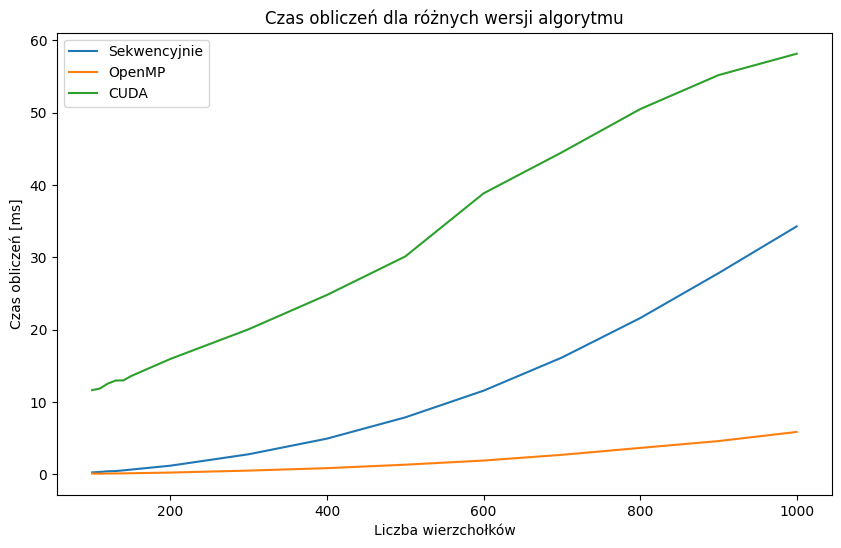

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

input_file = "../out/output.csv"
data = pd.read_csv(input_file, sep=",")

plt.figure(figsize=(10, 6))
           
plt.plot(data["Vertices"], data["SequentialTime"] / 1000, label="Sekwencyjnie")
plt.plot(data["Vertices"], data["OpenMpTime"] / 1000, label="OpenMP")
plt.plot(data["Vertices"], data["CudaTime"] / 1000, label="CUDA")

plt.title("Czas obliczeń dla różnych wersji algorytmu")
plt.xlabel("Liczba wierzchołków")
plt.ylabel("Czas obliczeń [ms]")

print(data.columns)

plt.legend()
plt.savefig("wykres.png")

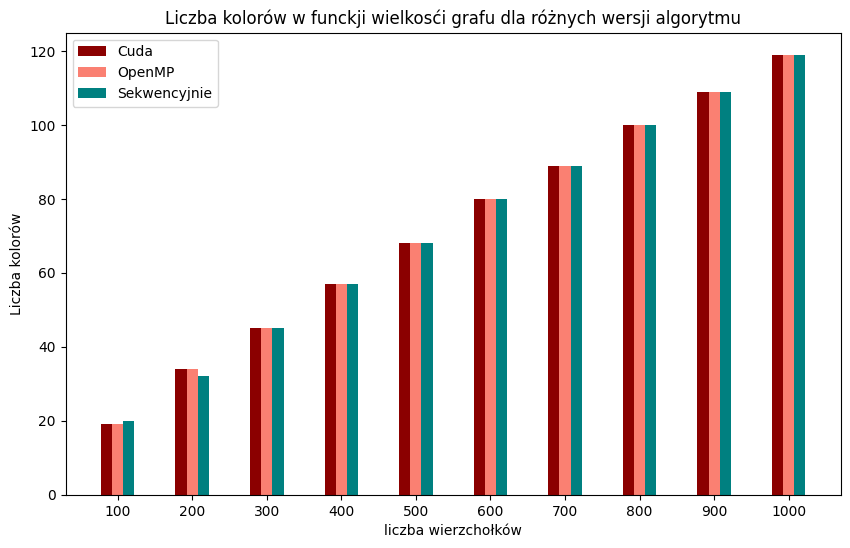

In [48]:
import matplotlib.colors as colors

data = data[data["Vertices"] % 100 == 0]


fig, ax = plt.subplots(figsize=(10, 6))  # Zmiana rozmiaru wykresu
width = 15
ind = data["Vertices"]

    # Wybór nazwanych kolorów
color1 = colors.CSS4_COLORS['darkred']
color2 = colors.CSS4_COLORS['salmon']
color3 = colors.CSS4_COLORS['teal']
color4 = colors.CSS4_COLORS['skyblue']

rects1 = ax.bar(ind - width, data['CudaRes'], width, label='Cuda', color=color1)
rects2 = ax.bar(ind, data['OpenMpRes'], width, label='OpenMP', color=color2)
rects3 = ax.bar(ind + width, data['SequentialRes'], width, label='Sekwencyjnie', color=color3)

ax.set_xticks(ind)
ax.set_xlabel("liczba wierzchołków")
ax.set_ylabel('Liczba kolorów')
ax.set_title("Liczba kolorów w funckji wielkosći grafu dla różnych wersji algorytmu")
ax.legend()

plt.savefig("bar.png")
plt.show()